##Importing Dependencies

In [4]:
# importing all the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 

In [5]:
# importing tensorflow
import tensorflow as tf

##Creating the model

In [20]:
# creating model
def create_model():
 model = tf.keras.Sequential()
 model.add(tf.keras.layers.Conv2D(15,3,input_shape =(50,50,3)))
 model.add(tf.keras.layers.MaxPool2D())
 model.add(tf.keras.layers.Flatten())
 model.add(tf.keras.layers.Dense(8, activation='softmax')) #1number of classes is 2
 return model

model1 = create_model()
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 15)        420       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 15)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8640)              0         
                                                                 
 dense_4 (Dense)             (None, 8)                 69128     
                                                                 
Total params: 69,548
Trainable params: 69,548
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compiling model using Adam optimizer.
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
# loading the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rescale=1.7255)
datagen_val = ImageDataGenerator(rescale = 1.7255)
train_generator = datagen_train.flow_from_directory(
    directory = r"/content/drive/MyDrive/Tea leaves classification/tea sickness dataset/tea sickness dataset/train", 
    target_size = (50,50),
    color_mode = "rgb",
    batch_size = 32,
    class_mode ="categorical",
    shuffle=True,
    seed=42
)
valid_generator= datagen_val.flow_from_directory(
    directory=r"/content/drive/MyDrive/Tea leaves classification/tea sickness dataset/tea sickness dataset/val",
    target_size=(50,50),
    color_mode='rgb',
    batch_size=32,
    class_mode="categorical",
    shuffle=False
) 

Found 529 images belonging to 8 classes.
Found 177 images belonging to 8 classes.


In [23]:
int_epoch = 10
history = model1.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=int_epoch,
                    batch_size=32)

Epoch 1/10
17/17 [==============================] - 50s 3s/step - loss: 1292.9399 - accuracy: 0.1437 - val_loss: 412.7283 - val_accuracy: 0.2712
Epoch 2/10
17/17 [==============================] - 46s 3s/step - loss: 211.6821 - accuracy: 0.2609 - val_loss: 146.2415 - val_accuracy: 0.3616
Epoch 3/10
17/17 [==============================] - 48s 3s/step - loss: 62.4267 - accuracy: 0.4726 - val_loss: 34.7797 - val_accuracy: 0.4859
Epoch 4/10
17/17 [==============================] - 46s 3s/step - loss: 18.8616 - accuracy: 0.6994 - val_loss: 24.0183 - val_accuracy: 0.5876
Epoch 5/10
17/17 [==============================] - 46s 3s/step - loss: 10.4801 - accuracy: 0.7599 - val_loss: 19.1770 - val_accuracy: 0.5989
Epoch 6/10
17/17 [==============================] - 46s 3s/step - loss: 7.9246 - accuracy: 0.7618 - val_loss: 25.7842 - val_accuracy: 0.5706
Epoch 7/10
17/17 [==============================] - 46s 3s/step - loss: 4.4387 - accuracy: 0.8299 - val_loss: 17.7042 - val_accuracy: 0.6328
Epo

Train accuracy is higher than val accuracy and loss is also high for val. So, there is overfit in the above model.

**To improve my model I have performed data augumetation, increased the number of layers and also increased number of epochs.**

##Data Preprocessing

In [1]:
# Data Augmentation for preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
datagen_val=ImageDataGenerator(rescale=1./255)
train_generator = datagen_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/Tea leaves classification/tea sickness dataset/tea sickness dataset/train",
    target_size=(200,200),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 529 images belonging to 8 classes.


In [2]:
valid_generator= datagen_val.flow_from_directory(
    directory=r"/content/drive/MyDrive/Tea leaves classification/tea sickness dataset/tea sickness dataset/val",
    target_size=(200,200),
    color_mode='rgb',
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 177 images belonging to 8 classes.


##Creating the Model

In [6]:
# Creating another sequential model with more layers for better performance.
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(10,3,input_shape=(200,200,3)))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Conv2D(20,3))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(56, activation='relu'))
  model.add(tf.keras.layers.Dense(20, activation='relu'))
  model.add(tf.keras.layers.Dense(8, activation='softmax'))
  return model
model2=create_model()
model2.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 20)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 46080)             0         
                                                                 
 dense (Dense)               (None, 56)                2

**CNN -**
CNNs consist of high number of filters which learn to capture spatial features from the image based on the learned weights through back propagation.

**Maxpool -**
Pooling layers are used to reduce the dimensions of the feature maps.So, it reduces the number of parameters to learn and the amount of computation performed in the network.

**Dense -**
In Dense networks we try to find patterns based on pixel values

In [7]:
# Compiling model using Adam optimizer.
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics='accuracy')

In [8]:
# Saving the best weights and fitting the model.
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model_aug.h5',
                                                  monitor = 'val_accuracy',
                                                  verbose =1,
                                                  save_best_only=True,
                                                  mode='max')
callbacks = [checkpointer]
int_epoch = 30
history = model2.fit(train_generator,
                    validation_data=valid_generator,
                    epochs = int_epoch,
                    batch_size=32)

Epoch 1/30
17/17 [==============================] - 457s 26s/step - loss: 2.6052 - accuracy: 0.1966 - val_loss: 1.9998 - val_accuracy: 0.2373
Epoch 2/30
17/17 [==============================] - 53s 3s/step - loss: 1.9482 - accuracy: 0.2495 - val_loss: 1.7018 - val_accuracy: 0.3503
Epoch 3/30
17/17 [==============================] - 51s 3s/step - loss: 1.6557 - accuracy: 0.3875 - val_loss: 1.5212 - val_accuracy: 0.3842
Epoch 4/30
17/17 [==============================] - 52s 3s/step - loss: 1.5343 - accuracy: 0.3705 - val_loss: 1.3767 - val_accuracy: 0.4463
Epoch 5/30
17/17 [==============================] - 51s 3s/step - loss: 1.4262 - accuracy: 0.4102 - val_loss: 1.2786 - val_accuracy: 0.4407
Epoch 6/30
17/17 [==============================] - 51s 3s/step - loss: 1.2962 - accuracy: 0.4575 - val_loss: 1.3385 - val_accuracy: 0.4689
Epoch 7/30
17/17 [==============================] - 51s 3s/step - loss: 1.2204 - accuracy: 0.4480 - val_loss: 1.1086 - val_accuracy: 0.5819
Epoch 8/30
17/17 [

##Monitoring and visualizing loss and accuracy of the model.

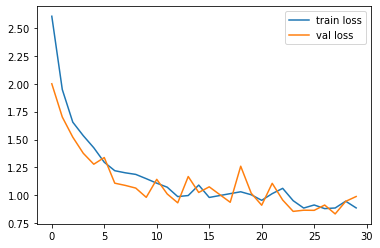

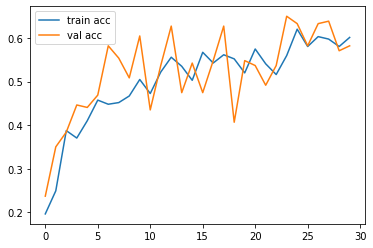

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

##Testing the Model

{'Anthracnose': 0, 'algal leaf': 1, 'bird eye spot': 2, 'brown blight': 3, 'gray light': 4, 'healthy': 5, 'red leaf spot': 6, 'white spot': 7}
The test image class is : 2


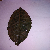

In [25]:
# Testing the model1 with single image
from tensorflow.keras.preprocessing import image
test_img=image.load_img('/content/drive/MyDrive/Tea leaves classification/tea sickness dataset/tea sickness dataset/bird eye spot/IMG_20220503_150405.jpg',
                       target_size=(50,50))
test_img1=image.img_to_array(test_img)
test_img1=test_img1/255.
test_img2=np.expand_dims(test_img1,axis=0)

ypred=model1.predict(test_img2)
print(train_generator.class_indices)

print('The test image class is :',ypred.argmax())
test_img

{'Anthracnose': 0, 'algal leaf': 1, 'bird eye spot': 2, 'brown blight': 3, 'gray light': 4, 'healthy': 5, 'red leaf spot': 6, 'white spot': 7}
The test image class is : 1


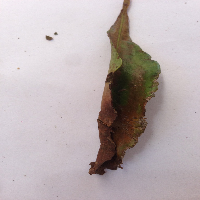

In [15]:
# Testing the model2 with single image
from tensorflow.keras.preprocessing import image
test_img=image.load_img('/content/drive/MyDrive/Tea leaves classification/tea sickness dataset/tea sickness dataset/test/algal leaf/UNADJUSTEDNONRAW_thumb_14.jpg',
                       target_size=(200,200))
test_img1=image.img_to_array(test_img)
test_img1=test_img1/255.
test_img2=np.expand_dims(test_img1,axis=0)

ypred=model2.predict(test_img2)
print(train_generator.class_indices)

print('The test image class is :',ypred.argmax())
test_img

**Thank You!**